# Linear Regression using Gradient Decent

## Step 1: Import All required Libraries

In [89]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler

## Step 2: Import Linear Regression for checking accuracy of defined model with original model

In [90]:
from sklearn.linear_model import LinearRegression

## Step 3: Defining class and functions for model training in this defined model the update function is used for updating the weight using gradient descent

In [91]:
  class learning() :
    # constructor taking learning rate and no of iterations
    def __init__( self, learning_rate, iterations ) :
        self.learning_rate = learning_rate
        self.iterations = iterations
    # function defined for fitting the model bias here is defined as 0
    def fit_model( self, X, Y ) :
        self.m, self.n = X.shape
        self.W = np.zeros( self.n )
        self.b = 0
        self.X = X
        self.Y = Y
        # Loops running for Gradient Decent Learning       
        for i in range( self.iterations ) :   
            self.update()
        return self
    # for updating the gradients of Y=X.W+C
    def update( self ) :     
        Y_pred = self.predict( self.X )
        # Differentating with respect to W
        dW = - ( 2 * ( self.X.T ).dot( self.Y - Y_pred )  ) / self.m
        # Differentating with respect to C or bias
        db = - 2 * np.sum( self.Y - Y_pred ) / self.m   
        # update weights
        self.W = self.W - self.learning_rate * dW
        self.b = self.b - self.learning_rate * db
        return self
    # for predicting using Y=X.W+c
    def predict( self, X ) :
        return X.dot( self.W ) + self.b

## Step 4: Loading CSV File for dataset (For this i have used boston house price predicition dataset provided by sklearn)

In [92]:
boston = load_boston()
features = pd.DataFrame(boston.data,columns=boston.feature_names)
target = pd.DataFrame(boston.target,columns=['target'])
df = pd.concat([features,target],axis=1)
print(boston.feature_names)
print(df.shape,df)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
(506, 14)         CRIM    ZN  INDUS  CHAS    NOX  ...    TAX  PTRATIO       B  LSTAT  target
0    0.00632  18.0   2.31   0.0  0.538  ...  296.0     15.3  396.90   4.98    24.0
1    0.02731   0.0   7.07   0.0  0.469  ...  242.0     17.8  396.90   9.14    21.6
2    0.02729   0.0   7.07   0.0  0.469  ...  242.0     17.8  392.83   4.03    34.7
3    0.03237   0.0   2.18   0.0  0.458  ...  222.0     18.7  394.63   2.94    33.4
4    0.06905   0.0   2.18   0.0  0.458  ...  222.0     18.7  396.90   5.33    36.2
..       ...   ...    ...   ...    ...  ...    ...      ...     ...    ...     ...
501  0.06263   0.0  11.93   0.0  0.573  ...  273.0     21.0  391.99   9.67    22.4
502  0.04527   0.0  11.93   0.0  0.573  ...  273.0     21.0  396.90   9.08    20.6
503  0.06076   0.0  11.93   0.0  0.573  ...  273.0     21.0  396.90   5.64    23.9
504  0.10959   0.0  11.93   0.0  0.573  ...  273.0     21.0  393.45   6.4

## Step 5: Store the features and target in X , Y seprately, here i have used the LSTAT feature as independelt feature (Any other feature can also be chosen for predicting target)

In [93]:
X = df['LSTAT'].values
Y = df['target'].values

# Reshaping the array using min max scaler
x_scaler = MinMaxScaler()
X = x_scaler.fit_transform(X.reshape(-1,1))
X = X[ : -1]
y_scaler = MinMaxScaler()
Y = y_scaler.fit_transform(Y.reshape(-1,1))
Y = Y[ : -1]

print(X.shape)
print(Y.shape)

(505, 1)
(505, 1)


## Step 6: Splitting the Data into three ratios 70/30, 80/20, 90/10 (Use the last one for best prediction)
A. Split the data in 70,30 for training and testing the model 

In [94]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=0)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


(353, 1) (152, 1) (353, 1) (152, 1)


B. Split the data in 80,20 for training and testing the model 

In [95]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(404, 1) (101, 1) (404, 1) (101, 1)


C. Split the data in 90,10 for training and testing the model

In [96]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.1, random_state=1)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


(454, 1) (51, 1) (454, 1) (51, 1)


## Step 7: Creating model object and passing values which are no of iterations and learning rate

In [97]:
model = learning(learning_rate=0.001,iterations=10000)

## Step 8: Fitting model using training data

In [98]:
model.fit_model(X_train,y_train)

## Step 9: Creating model provided by Sklearn and fitting that model with training data

In [99]:
model1 = LinearRegression()
model1.fit( X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## Step 10: Predicting the values of both models using test data

In [100]:
target = model.predict(X_test)
target1 = model1.predict( X_test )
target = target[:,1]
print(target,target1)

[0.45042117 0.45441664 0.32176723 0.44391427 0.3743932  0.40943913
 0.48272735 0.38752115 0.33181297 0.43580919 0.41377706 0.48375476
 0.38101425 0.41948487 0.40258976 0.26994035 0.38295491 0.48352645
 0.45156273 0.19927771 0.40510119 0.34631079 0.43044385 0.46651719
 0.48306982 0.34048883 0.30418719 0.41617434 0.45350339 0.1868347
 0.47370902 0.32564854 0.50350377 0.333297   0.43261282 0.39927923
 0.26263436 0.47553552 0.31594527 0.41560356 0.45259014 0.45932535
 0.44962208 0.32930153 0.30898174 0.30099082 0.51446276 0.45635729
 0.42439358 0.41503278 0.37245255] [[0.49972615]
 [0.50705185]
 [0.26383855]
 [0.48779572]
 [0.36032851]
 [0.42458538]
 [0.55895968]
 [0.38439867]
 [0.28225746]
 [0.47293501]
 [0.432539  ]
 [0.56084343]
 [0.37246824]
 [0.44300429]
 [0.41202703]
 [0.16881374]
 [0.37602644]
 [0.56042482]
 [0.50181921]
 [0.03925347]
 [0.41663176]
 [0.30883929]
 [0.46309764]
 [0.52923826]
 [0.5595876 ]
 [0.2981647 ]
 [0.23160547]
 [0.43693442]
 [0.50537741]
 [0.01643914]
 [0.542424

## Step 11: Checking for Accuracy by plotting the target values and the predicted values by both the models



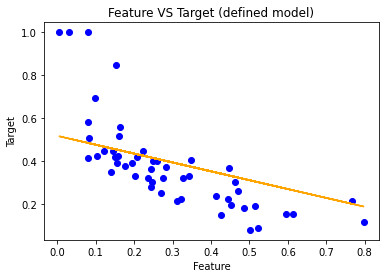

In [101]:
plt.scatter( X_test, y_test, color = 'blue' )  
plt.plot( X_test, target, color = 'orange' )  
plt.title( 'Feature VS Target (defined model)' )  
plt.xlabel( 'Feature' )  
plt.ylabel( 'Target' )  
plt.show()

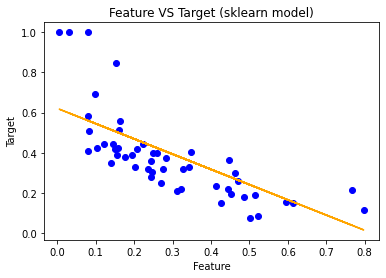

In [102]:
plt.scatter( X_test, y_test, color = 'blue' )  
plt.plot( X_test, target1, color = 'orange' )    
plt.title( 'Feature VS Target (sklearn model)' )  
plt.xlabel( 'Feature' )  
plt.ylabel( 'Target' )    
plt.show()

In [103]:
print("Mean squared error in Predicition by defined model on test data: ",mean_squared_error(target,y_test)*100)
print("Mean squared error in Predicition by original(sklearn) model on test data: ",mean_squared_error(target1,y_test)*100)

Mean squared error in Predicition by defined model on test data:  2.7681670539880123
Mean squared error in Predicition by original(sklearn) model on test data:  2.142687769346051


# For the training set Accuracy and plot

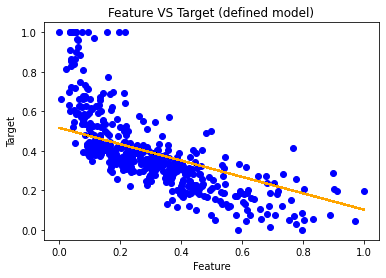

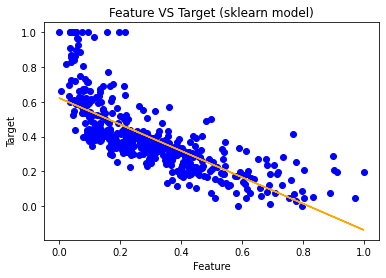

Mean squared error in Predicition by defined model on training data :  2.7681670539880123
Mean squared error in Predicition by original(sklearn) model on training data :  2.142687769346051


In [105]:
t = model.predict(X_train)
t1 = model1.predict( X_train )
plt.scatter( X_train, y_train, color = 'blue' )  
plt.plot( X_train, t, color = 'orange' )  
plt.title( 'Feature VS Target (defined model)' )  
plt.xlabel( 'Feature' )  
plt.ylabel( 'Target' )  
plt.show()
plt.scatter( X_train, y_train, color = 'blue' )  
plt.plot( X_train, t1, color = 'orange' )  
plt.title( 'Feature VS Target (sklearn model)' )  
plt.xlabel( 'Feature' )  
plt.ylabel( 'Target' )  
plt.show()
print("Mean squared error in Predicition by defined model on training data : ",mean_squared_error(target,y_test)*100)
print("Mean squared error in Predicition by original(sklearn) model on training data : ",mean_squared_error(target1,y_test)*100)